In [ ]:
import random

In [32]:
random.seed(1)

In [33]:
G=500;n=25;m=20;mutation_prob=75;

In [34]:
# %debug
import ipdb


def fit_func(current_set, bd):
    current_set['fit_value']=0
    #here is the work to calculate fittness by diagonal testing
    for row, col in enumerate(current_set['data']):

        #t=temp

        t1 = row - 1  #i-
        t2 = col - 1  #j-
        t3 = row + 1  #i+
        t4 = col + 1  #j+

        check = False
        #             ipdb.set_trace()
        for i in range(bd - 1):  # -1 because it should not check self record

            #we only check one side(diagonal) because there is no repitition of queen in row and column

            #for left diagonal

            #upper-left
            if (t2 >= 0 and t2 <= bd - 1) and (t1 >= 0 and t1 <= bd - 1):
                if current_set['data'][t1] != t2:
                    check = True
                else:
                    check = False
                    break

            #lower-left
            if (t2 >= 0 and t2 <= bd - 1) and (t3 >= 0 and t3 <= bd - 1):
                if current_set['data'][t3] != t2:
                    check = True
                else:
                    check = False
                    break

            #for right diagonal columns

            #upper-right
            if (t4 >= 0 and t4 <= bd - 1) and (t1 >= 0 and t1 <= bd - 1):
                if current_set['data'][t1] != t4:
                    check = True
                else:
                    check = False
                    break

            #lower-right
            if (t4 >= 0 and t4 <= bd - 1) and (t3 >= 0 and t3 <= bd - 1):
                if current_set['data'][t3] != t4:
                    check = True
                else:
                    check = False
                    break

            t1 -= 1
            t2 -= 1
            t3 += 1
            t4 += 1

        if check:
            #             print(row)
            current_set['fit_value'] += 1

In [35]:
helll={'data': [2, 4, 1, 7, 0, 6, 3, 5],'fit_value':0}
fit_func(helll,8)
helll

{'data': [2, 4, 1, 7, 0, 6, 3, 5], 'fit_value': 8}

In [44]:
#init population
board_dim = int(input("Enter dimension of chess board="))
nList = []

for i in range(n):
    x = []
    for i in range(board_dim):
        x=random.sample(range(board_dim),board_dim)

    nList.append({'data': x, 'fit_value': 0})

    
# %debug
# import ipdb

gen=0
while 1:
    
    ok=False
    
    for cs in nList:
        fit_func(cs,board_dim)
#         print(cs)
        if cs['fit_value']==board_dim:
            print(",answer={},gen={}".format(cs,gen))
            ok=True
            break
    
    #found best break
    if ok:
        break
        
    #if answer not found get top 25 from previous generation    
    nList=sorted(nList,key=lambda item:item['fit_value'],reverse=True)[:25]
    
    gen+=1
    mList = []
    for j in range(int(m / 2)):
        #randomly parent selection(not same)
 
        t=random.sample(range(n),2)
        
        p1 = nList[t[0]]['data']
        p2 = nList[t[1]]['data']

        #crossover
        ch1 = p1[:int((board_dim / 2)) - 1] + p2[int((board_dim / 2)) - 1:]
        ch2 = p2[:int((board_dim / 2)) - 1] + p1[int((board_dim / 2)) - 1:]

        #remove duplicated but order remain same ;)
        ch1 = sorted(set(ch1), key=ch1.index)
        ch2 = sorted(set(ch2), key=ch2.index)

        #get which are not in ch1 but for completeness we get from respective parent
        #R=remaining
        ch1R = [el for el in p2 if el not in ch1]
        ch2R = [el for el in p1 if el not in ch2]

        #filling remaining getting by traversing
        ch1 += ch1R
        ch2 += ch2R

        #mutation work
        for k in [ch1, ch2]:
            if random.randint(0, 100) <= mutation_prob:
                
                r_ind=random.sample(range(board_dim),2)

                #swaping
                
                k[r_ind[0]], k[r_ind[1]] = k[r_ind[1]], k[r_ind[0]]

        mList.append({'data': ch1, 'fit_value': 0})
        mList.append({'data': ch2, 'fit_value': 0})

    #combine both mList and nList

    nList += mList
    
    

Enter dimension of chess board=5
,answer={'data': [2, 4, 1, 3, 0], 'fit_value': 5},gen=0


In [37]:
# haris=[27, 39, 26, 32, 44, 1, 49, 11, 16, 40, 3, 28, 48, 23, 30, 5, 37, 17, 13, 47, 38, 0, 29, 34, 6, 31, 12, 46, 9, 18, 45, 2, 20, 10, 8, 15, 33, 22, 25, 41, 24, 4, 36, 42, 35, 43, 21, 7, 14, 19]

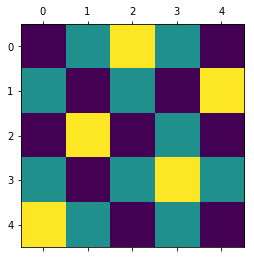

In [46]:
#chessboard graph
import matplotlib.pyplot as plt
import numpy as np

def plot_func(dim):
    temp=np.zeros((dim,dim))
    
    c=0
    for i in range(dim):
        for j in range(dim):
            if c%2==0:
                temp[i,j]=1
                c+=1
            else:
                temp[i,j]=2
                c+=1
                
        if dim%2==0:
            c+=1

    for t in cs['data']:
        temp[t,cs['data'][t]]=3
    
    return temp

plt.matshow(plot_func(board_dim))
plt.show()